In [30]:
import pandas as pd

In [31]:
df = pd.read_csv("Housing_data.csv")

In [32]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [33]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
X

array([[7420,    4,    2,    3,    2],
       [8960,    4,    4,    4,    3],
       [9960,    3,    2,    2,    2],
       ...,
       [3620,    2,    1,    1,    0],
       [2910,    3,    1,    1,    0],
       [3850,    3,    1,    2,    0]], dtype=int64)

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [35]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
print(X_train)
X_test = sc_X.fit_transform(X_test)
print(X_test)

[[-1.55021716 -1.35446064 -0.57931017  0.18542633 -0.82872033]
 [ 0.09760377  0.06251357 -0.57931017 -0.94373698 -0.82872033]
 [-1.05087748 -1.35446064 -0.57931017 -0.94373698 -0.82872033]
 ...
 [ 0.32230663  0.06251357  1.47598157  2.44375293  0.30972376]
 [-0.75127368  0.06251357 -0.57931017 -0.94373698  0.30972376]
 [ 0.74674535  0.06251357 -0.57931017 -0.94373698 -0.82872033]]
[[-0.49625938  0.00885962 -0.54886654  0.35539826  0.51261937]
 [ 1.6698448   0.00885962 -0.54886654 -0.89305203  1.76670603]
 [-0.70439039  1.2226281  -0.54886654  0.35539826 -0.7414673 ]
 [ 3.04967629 -1.20490885 -0.54886654 -0.89305203  0.51261937]
 [-0.62730483  1.2226281  -0.54886654  0.35539826 -0.7414673 ]
 [ 0.40949593  0.00885962  1.28515093  1.60384855 -0.7414673 ]
 [-0.55407355  0.00885962 -0.54886654 -0.89305203  1.76670603]
 [-0.69668183  0.00885962 -0.54886654  0.35539826  0.51261937]
 [-0.68434814 -1.20490885 -0.54886654 -0.89305203  0.51261937]
 [ 1.43087957  1.2226281   1.28515093  2.85229885

In [36]:
from sklearn.svm import SVC
classifier = SVC(kernel = "linear", random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [37]:
y_pred = classifier.predict(X_test)
y_pred

array([ 4200000,  5950000,  4900000,  4305000,  4900000,  6650000,
        4025000,  4200000,  2450000,  7700000,  7910000,  4900000,
        4900000,  4900000,  4900000,  2660000,  2450000,  4900000,
        4900000,  3150000,  5250000,  5250000,  4900000,  3430000,
        5600000,  2660000,  4200000,  4200000,  4200000,  4900000,
        3500000,  4200000,  5950000,  2450000,  4900000,  3920000,
        4550000,  4900000,  3675000,  4900000,  7700000,  5950000,
        8463000,  4900000,  3010000,  6650000,  3010000,  3675000,
        4200000,  4200000,  4200000,  8400000,  3430000,  3675000,
        4200000,  2450000,  7420000,  4340000,  3675000,  5600000,
        7000000,  5600000,  4200000,  7210000,  2450000,  4200000,
        6300000,  3500000,  4900000,  4200000,  4900000,  7210000,
        3010000,  4200000,  2450000,  2450000,  4340000,  9681000,
        2660000,  3675000,  4900000,  4900000,  4200000,  5600000,
        4900000,  4550000,  3640000,  2450000,  4900000,  4025

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

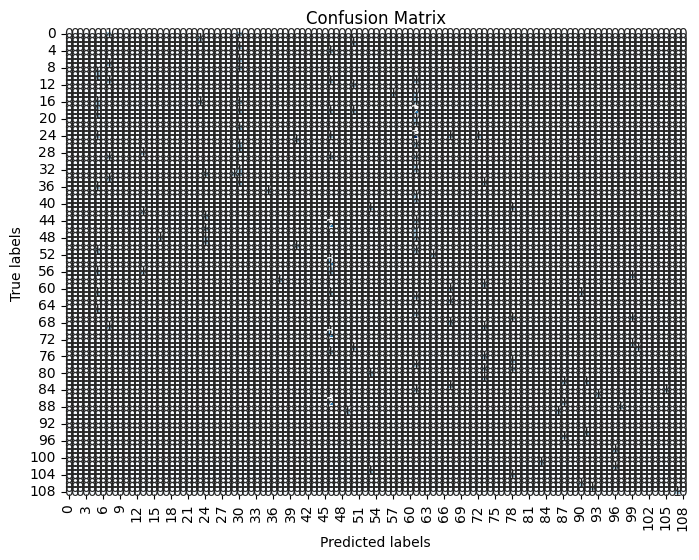

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [40]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Evaluation metrics for Linear Kernel:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.014598540145985401
Precision: 0.00851581508515815
Recall: 0.014598540145985401
F1-score: 0.009384775808133471
